In [3]:
import pandas as pd 
import urllib.request
from bs4 import BeautifulSoup
import requests
from splinter import Browser
import time
%matplotlib inline
import matplotlib.pyplot as plt


In [4]:
NBAinjury_df = pd.read_csv("injuries-2018.csv")

In [5]:
NBAinjury_df.head()

Date  Year       Team          Player                          Notes
0  1/1/2018  2018    Blazers  Meyers Leonard             returned to lineup
1  1/1/2018  2018      Kings     Frank Mason       bruised right heel (DTD)
2  1/1/2018  2018    Rockets    James Harden  strained left hamstring (DTD)
3  1/2/2018  2018  Cavaliers   Isaiah Thomas             returned to lineup
4  1/2/2018  2018   Clippers   Austin Rivers      sore right Achilles (DTD)

In [6]:
#Now we want to upload the bio data for NBA players 2019 (age,height,weight..etc)

NBAbio_df = pd.read_csv("../DataFrames/NBA_bio.csv")
NBAbio_df


Unnamed: 0               Player Team  Age  Height  Weight  \
0             0         Aaron Gordon  ORL   23    6.75     220   
1             1        Aaron Holiday  IND   22    6.08     185   
2             2          Abdel Nader  OKC   25    6.50     225   
3             3           Al Horford  BOS   33    6.83     245   
4             4      Al-Farouq Aminu  POR   28    6.75     220   
5             5        Alan Williams  BKN   26    6.67     265   
6             6           Alec Burks  SAC   27    6.50     214   
7             7         Alex Abrines  OKC   25    6.50     200   
8             8          Alex Caruso  LAL   25    6.42     186   
9             9             Alex Len  ATL   26    7.08     250   
10           10       Alex Poythress  ATL   25    6.75     235   
11           11     Alfonzo McKinnie  GSW   26    6.67     215   
12           12        Alize Johnson  IND   23    6.75     212   
13           13         Allen Crabbe  BKN   27    6.50     212   
14           14        Allonzo Trier  NYK   23    6.42     200   
15           15      Amile Jefferson  ORL   26    6.75     222   
16           16         Amir Johnson  PHI   32    6.75     240   
17           17       Andre Drummond  DET   25    6.92     279   
18           18       Andre Iguodala  GSW   35    6.50     215   
19           19         Andre Ingram  LAL   33    6.25     190   
20           20         Andrew Bogut  GSW   34    7.00     260   
21           21      Andrew Harrison  NOP   24    6.50     213   
22           22       Andrew Wiggins  MIN   24    6.67     194   
23           23      Anfernee Simons  POR   20    6.33     185   
24           24        Angel Delgado  LAC   24    6.83     245   
25           25           Ante Zizic  CLE   22    6.92     254   
26           26        Anthony Davis  NOP   26    6.83     253   
27           27     Anthony Tolliver  MIN   34    6.67     250   
28           28     Antonio Blakeney  CHI   22    6.33     192   
29           29          Aron Baynes  BOS   32    6.83     260   
..          ...                  ...  ...  ...     ...     ...   
620         620         Tyler Zeller  MEM   29    7.00     253   
621         621         Tyreke Evans  IND   29    6.50     220   
622         622       Tyrone Wallace  LAC   25    6.42     198   
623         623       Tyson Chandler  LAL   36    7.08     240   
624         624           Tyus Jones  MIN   23    6.17     196   
625         625        Udonis Haslem  MIA   39    6.67     235   
626         626       Victor Oladipo  IND   27    6.33     210   
627         627         Vince Carter  ATL   42    6.50     220   
628         628      Vincent Edwards  HOU   23    6.67     225   
629         629      Wade Baldwin IV  POR   23    6.33     200   
630         630     Walter Lemon Jr.  CHI   26    6.25     180   
631         631      Wayne Ellington  DET   31    6.42     200   
632         632         Wayne Selden  CHI   24    6.42     230   
633         633   Wendell Carter Jr.  CHI   20    6.83     255   
634         634           Wes Iwundu  ORL   24    6.58     195   
635         635       Wesley Johnson  WAS   31    6.58     215   
636         636      Wesley Matthews  IND   32    6.42     220   
637         637          Will Barton  DEN   28    6.50     190   
638         638  Willie Cauley-Stein  SAC   25    7.00     240   
639         639    Willy Hernangomez  CHA   25    6.92     240   
640         640      Wilson Chandler  LAC   32    6.75     225   
641         641          Yante Maten  MIA   22    6.67     240   
642         642         Yogi Ferrell  SAC   26    6.00     180   
643         643        Yuta Watanabe  MEM   24    6.75     205   
644         644         Zach Collins  POR   21    7.00     235   
645         645          Zach LaVine  CHI   24    6.42     200   
646         646          Zach Lofton  DET   26    6.33     180   
647         647        Zaza Pachulia  DET   35    6.92     270   
648         648         Zhaire Smith  PHI   2

In [7]:
NBAbio_df = NBAbio_df.loc[:, ~NBAbio_df.columns.str.contains('^Unnamed')]
NBAbio_df

Player Team  Age  Height  Weight                   College  \
0           Aaron Gordon  ORL   23    6.75     220                   Arizona   
1          Aaron Holiday  IND   22    6.08     185    California-Los Angeles   
2            Abdel Nader  OKC   25    6.50     225                Iowa State   
3             Al Horford  BOS   33    6.83     245                   Florida   
4        Al-Farouq Aminu  POR   28    6.75     220               Wake Forest   
5          Alan Williams  BKN   26    6.67     265  California-Santa Barbara   
6             Alec Burks  SAC   27    6.50     214                  Colorado   
7           Alex Abrines  OKC   25    6.50     200                      None   
8            Alex Caruso  LAL   25    6.42     186                 Texas A&M   
9               Alex Len  ATL   26    7.08     250                  Maryland   
10        Alex Poythress  ATL   25    6.75     235                  Kentucky   
11      Alfonzo McKinnie  GSW   26    6.67     215                      None   
12         Alize Johnson  IND   23    6.75     212            Missouri State   
13          Allen Crabbe  BKN   27    6.50     212                California   
14         Allonzo Trier  NYK   23    6.42     200     University of Arizona   
15       Amile Jefferson  ORL   26    6.75     222                      Duke   
16          Amir Johnson  PHI   32    6.75     240                      None   
17        Andre Drummond  DET   25    6.92     279               Connecticut   
18        Andre Iguodala  GSW   35    6.50     215                   Arizona   
19          Andre Ingram  LAL   33    6.25     190                  American   
20          Andrew Bogut  GSW   34    7.00     260                      Utah   
21       Andrew Harrison  NOP   24    6.50     213                  Kentucky   
22        Andrew Wiggins  MIN   24    6.67     194                    Kansas   
23       Anfernee Simons  POR   20    6.33     185                      None   
24         Angel Delgado  LAC   24    6.83     245                      None   
25            Ante Zizic  CLE   22    6.92     254                      None   
26         Anthony Davis  NOP   26    6.83     253                  Kentucky   
27      Anthony Tolliver  MIN   34    6.67     250                 Creighton   
28      Antonio Blakeney  CHI   22    6.33     192           Louisiana State   
29           Aron Baynes  BOS   32    6.83     260          Washington State   
..                   ...  ...  ...     ...     ...                       ...   
620         Tyler Zeller  MEM   29    7.00     253            North Carolina   
621         Tyreke Evans  IND   29    6.50     220                   Memphis   
622       Tyrone Wallace  LAC   25    6.42     198                California   
623       Tyson Chandler  LAL   36    7.08     240                      None   
624           Tyus Jones  MIN   23    6.17     196                      Duke   
625        Udonis Haslem  MIA   39    6.67     235                   Florida   
626       Victor Oladipo  IND   27    6.33     210                   Indiana   
627         Vince Carter  ATL   42    6.50     220            North Carolina   
628      Vincent Edwards  HOU   23    6.67     225                    Purdue   
629      Wade Baldwin IV  POR   23    6.33     200                Vanderbilt   
630     Walter Lemon Jr.  CHI   26    6.25     180                      None   
631      Wayne Ellington  DET   31    6.42     200            North Carolina   
632         Wayne Selden  CHI   24    6.42     230                    Kansas   
633   Wendell Carter Jr.  CHI   20    6.83     255             West Virginia   
634           Wes Iwundu  ORL   24    6.58     195              Kansas State   
635       Wesley Johnson  WAS   31    6.58     215                  Syracuse   
636      Wesley Matthews  IND   32    6.42     220                 Marquette   
637          Will Barton  DEN   28    6.50     190                   Memphis   
638  Willie Cauley

In [10]:
#Now we scrape the 2018 Stats Data

# Use the read_html function in Pandas to automatically scrape any tabular data from a page.
data_url = "https://www.basketball-reference.com/leagues/NBA_2018_per_game.html"

#using the pandas .read_html() method, we can convert the html tables found the page to pandas dataframes.
# Note the result of the .read_html() method is a list of dataframes pulled from the page.. In this case there is only one table
url_tables = pd.read_html(data_url, encoding= "utf-8")

# # Reference the first element of our list of dataframes
stats18_df = url_tables[0]

# new_header = stats19_df.iloc[0] #grab the first row for the header
# stats19_df = stats19_df[1:] #take the data less the header row
# stats19_df.columns = new_header #set the header row as the df header


stats18_df.head()

Rk         Player Pos Age   Tm   G  GS    MP   FG  FGA  ...    FT%  ORB  \
0  1   Alex Abrines  SG  24  OKC  75   8  15.1  1.5  3.9  ...   .848  0.3   
1  2     Quincy Acy  PF  27  BRK  70   8  19.4  1.9  5.2  ...   .817  0.6   
2  3   Steven Adams   C  24  OKC  76  76  32.7  5.9  9.4  ...   .559  5.1   
3  4    Bam Adebayo   C  20  MIA  69  19  19.8  2.5  4.9  ...   .721  1.7   
4  5  Arron Afflalo  SG  32  ORL  53   3  12.9  1.2  3.1  ...   .846  0.1   

   DRB  TRB  AST  STL  BLK  TOV   PF   PTS  
0  1.2  1.5  0.4  0.5  0.1  0.3  1.7   4.7  
1  3.1  3.7  0.8  0.5  0.4  0.9  2.1   5.9  
2  4.0  9.0  1.2  1.2  1.0  1.7  2.8  13.9  
3  3.8  5.5  1.5  0.5  0.6  1.0  2.0   6.9  
4  1.2  1.2  0.6  0.1  0.2  0.4  1.1   3.4  

[5 rows x 30 columns]

In [11]:
stats18_df_new = stats18_df.drop(["Rk"], axis =1)
stats18_df_new

Player  Pos  Age   Tm   G  GS    MP   FG   FGA   FG%  \
0             Alex Abrines   SG   24  OKC  75   8  15.1  1.5   3.9  .395   
1               Quincy Acy   PF   27  BRK  70   8  19.4  1.9   5.2  .356   
2             Steven Adams    C   24  OKC  76  76  32.7  5.9   9.4  .629   
3              Bam Adebayo    C   20  MIA  69  19  19.8  2.5   4.9  .512   
4            Arron Afflalo   SG   32  ORL  53   3  12.9  1.2   3.1  .401   
5             Cole Aldrich    C   29  MIN  21   0   2.3  0.2   0.7  .333   
6        LaMarcus Aldridge    C   32  SAS  75  75  33.5  9.2  18.0  .510   
7            Jarrett Allen    C   19  BRK  72  31  20.0  3.3   5.5  .589   
8             Kadeem Allen   PG   25  BOS  18   1   5.9  0.3   1.2  .273   
9               Tony Allen   SF   36  NOP  22   0  12.4  2.0   4.1  .484   
10         Al-Farouq Aminu   PF   27  POR  69  67  30.0  3.3   8.4  .395   
11         Justin Anderson   SF   24  PHI  38   0  13.7  2.3   5.3  .431   
12           Kyle Anderson   SF   24  SAS  74  67  26.7  3.1   5.9  .527   
13           Ryan Anderson   PF   29  HOU  66  50  26.1  3.1   7.3  .431   
14            Ike Anigbogu    C   19  IND  11   0   2.7  0.4   0.8  .444   
15   Giannis Antetokounmpo   PF   23  MIL  75  75  36.7  9.9  18.7  .529   
16         Carmelo Anthony   PF   33  OKC  78  78  32.1  6.1  15.0  .404   
17              OG Anunoby   SF   20  TOR  74  62  20.0  2.2   4.7  .471   
18        Ryan Arcidiacono   PG   23  CHI  24   0  12.7  0.7   1.7  .415   
19            Trevor Ariza   SF   32  HOU  67  67  33.9  4.0   9.7  .412   
20                  Player  Pos  Age   Tm   G  GS    MP   FG   FGA   FG%   
21          Darrell Arthur   PF   29  DEN  19   1   7.4  1.2   2.5  .468   
22             Jamel Artis   SG   25  ORL  15   1  18.6  2.1   5.3  .392   
23               Omer Asik    C   31  TOT  18   0  10.1  0.5   1.2  .409   
24               Omer Asik    C   31  NOP  14   0   8.6  0.5   1.1  .438   
25               Omer Asik    C   31  CHI   4   0  15.3  0.5   1.5  .333   
26           D.J. Augustin   PG   30  ORL  75  36  23.5  3.3   7.2  .452   
27            Luke Babbitt   SF   28  TOT  50  14  14.3  1.8   4.3  .423   
28            Luke Babbitt   SF   28  ATL  37   9  15.4  2.2   4.5  .476   
29            Luke Babbitt   SF   28  MIA  13   5  11.2  0.8   3.6  .234   
..                     ...  ...  ...  ...  ..  ..   ...  ...   ...   ...   
660          C.J. Williams   SG   27  LAC  38  17  18.6  2.3   5.2  .442   
661       Derrick Williams   PF   26  LAL   2   0   4.5  0.5   2.0  .250   
662           Lou Williams   SG   31  LAC  79  19  32.8  7.4  16.9  .435   
663                 Player  Pos  Age   Tm   G  GS    MP   FG   FGA   FG%   
664        Marvin Williams   PF   31  CHO  78  78  25.7  3.3   7.2  .458   
665          Matt Williams   SG   24  MIA   3   0   3.7  0.7   2.0  .333   
666          Troy Williams   SF   23  TOT  21   1  14.6  2.4   5.2  .468   
667          Troy Williams   SF   23  HOU   4   0   4.3  0.5   2.3  .222   
668          Troy Williams   SF   23  NYK  17   1  17.1  2.9   5.9  .490   
669            D.J. Wilson   PF   21  MIL  22   0   3.2  0.4   0.7  .563   
670           Jamil Wilson   SF   27  LAC  15  10  18.3  2.5   5.4  .469   
671        Justise Winslow   PF   21  MIA  68  25  24.7  3.0   7.2  .424   
672            Jeff Withey    C   27  DAL   9   0   4.3  0.7   1.8  .375   
673           Nate Wolters   PG   26  UTA   5   0   3.8  0.2   1.2  .167   
674         Brandan Wright   PF   30  TOT  28   1  13.6  2.1   3.6  .578   
675         Brandan Wright   PF   30  MEM  27   1  13.6  2.1   3.7  .576   
676         Brandan Wright   PF   30  HOU   1   0  15.0  2.0   3.0  .667   
677           Delon Wright   PG   25  TOR  69   4  20.8  2.9   6.3  .465   
678     Guerschon Yabusele   PF   22  BOS  33   4   7.1  0.8   1.8  .426   
679            James Young   SG   22  PHI   6   0  10.2  0.8   2.3  .357   
680              Joe Young   PG   25  IND  53   1  10.5  1.5   3.5  

In [12]:
stats18_df.to_csv("NBA_Stats.csv", index=False)

In [13]:
pos_min_df = stats18_df[["Player", "Pos", "MP"]]
pos_min_df

Player  Pos    MP
0             Alex Abrines   SG  15.1
1               Quincy Acy   PF  19.4
2             Steven Adams    C  32.7
3              Bam Adebayo    C  19.8
4            Arron Afflalo   SG  12.9
5             Cole Aldrich    C   2.3
6        LaMarcus Aldridge    C  33.5
7            Jarrett Allen    C  20.0
8             Kadeem Allen   PG   5.9
9               Tony Allen   SF  12.4
10         Al-Farouq Aminu   PF  30.0
11         Justin Anderson   SF  13.7
12           Kyle Anderson   SF  26.7
13           Ryan Anderson   PF  26.1
14            Ike Anigbogu    C   2.7
15   Giannis Antetokounmpo   PF  36.7
16         Carmelo Anthony   PF  32.1
17              OG Anunoby   SF  20.0
18        Ryan Arcidiacono   PG  12.7
19            Trevor Ariza   SF  33.9
20                  Player  Pos    MP
21          Darrell Arthur   PF   7.4
22             Jamel Artis   SG  18.6
23               Omer Asik    C  10.1
24               Omer Asik    C   8.6
25               Omer Asik    C  15.3
26           D.J. Augustin   PG  23.5
27            Luke Babbitt   SF  14.3
28            Luke Babbitt   SF  15.4
29            Luke Babbitt   SF  11.2
..                     ...  ...   ...
660          C.J. Williams   SG  18.6
661       Derrick Williams   PF   4.5
662           Lou Williams   SG  32.8
663                 Player  Pos    MP
664        Marvin Williams   PF  25.7
665          Matt Williams   SG   3.7
666          Troy Williams   SF  14.6
667          Troy Williams   SF   4.3
668          Troy Williams   SF  17.1
669            D.J. Wilson   PF   3.2
670           Jamil Wilson   SF  18.3
671        Justise Winslow   PF  24.7
672            Jeff Withey    C   4.3
673           Nate Wolters   PG   3.8
674         Brandan Wright   PF  13.6
675         Brandan Wright   PF  13.6
676         Brandan Wright   PF  15.0
677           Delon Wright   PG  20.8
678     Guerschon Yabusele   PF   7.1
679            James Young   SG  10.2
680              Joe Young   PG  10.5
681             Nick Young   SG  17.4
682         Thaddeus Young   PF  32.2
683            Cody Zeller    C  19.0
684           Tyler Zeller    C  16.8
685           Tyler Zeller    C  16.7
686           Tyler Zeller    C  16.9
687            Paul Zipser   SF  15.3
688             Ante Zizic    C   6.7
689            Ivica Zubac    C   9.5

[690 rows x 3 columns]

In [14]:
mergedStats_df= pd.merge(NBAbio_df, pos_min_df, on='Player', how='outer')
mergedStats_df.head()

Player Team   Age  Height  Weight                 College  \
0     Aaron Gordon  ORL  23.0    6.75   220.0                 Arizona   
1    Aaron Holiday  IND  22.0    6.08   185.0  California-Los Angeles   
2      Abdel Nader  OKC  25.0    6.50   225.0              Iowa State   
3       Al Horford  BOS  33.0    6.83   245.0                 Florida   
4  Al-Farouq Aminu  POR  28.0    6.75   220.0             Wake Forest   

            Country Draft Year Draft Round Draft Number  ...   REB  AST  \
0               USA       2014           1            4  ...   7.4  3.7   
1               USA       2018           1           23  ...   1.3  1.7   
2             Egypt       2016           2           58  ...   1.9  0.3   
3  Dominican Rep...       2007           1            3  ...   6.7  4.2   
4               USA       2010           1            8  ...   7.5  1.3   

   NetRtg  OREB%   DREB%    USG%     TS%    AST%  Pos    MP  
0     1.5  4.70%  16.50%  21.30%  53.80%  16.60%   PF  32.9  
1     7.0  0.80%   8.80%  20.60%  51.80%  18.00%  NaN   NaN  
2    -9.5  1.70%  13.90%  14.80%  52.20%   4.40%   SF  10.9  
3     6.1  6.20%  16.10%  18.80%  60.50%  20.30%    C  31.6  
4     8.2  4.80%  20.40%  13.40%  56.80%   5.70%   PF  30.0  

[5 rows x 22 columns]

In [15]:
mergedStats_df = mergedStats_df[pd.notnull(mergedStats_df['Team'])]

In [16]:
mergedStats_df

Player Team   Age  Height  Weight                   College  \
0        Aaron Gordon  ORL  23.0    6.75   220.0                   Arizona   
1       Aaron Holiday  IND  22.0    6.08   185.0    California-Los Angeles   
2         Abdel Nader  OKC  25.0    6.50   225.0                Iowa State   
3          Al Horford  BOS  33.0    6.83   245.0                   Florida   
4     Al-Farouq Aminu  POR  28.0    6.75   220.0               Wake Forest   
5       Alan Williams  BKN  26.0    6.67   265.0  California-Santa Barbara   
6          Alec Burks  SAC  27.0    6.50   214.0                  Colorado   
7        Alex Abrines  OKC  25.0    6.50   200.0                      None   
8         Alex Caruso  LAL  25.0    6.42   186.0                 Texas A&M   
9            Alex Len  ATL  26.0    7.08   250.0                  Maryland   
10     Alex Poythress  ATL  25.0    6.75   235.0                  Kentucky   
11   Alfonzo McKinnie  GSW  26.0    6.67   215.0                      None   
12      Alize Johnson  IND  23.0    6.75   212.0            Missouri State   
13       Allen Crabbe  BKN  27.0    6.50   212.0                California   
14      Allonzo Trier  NYK  23.0    6.42   200.0     University of Arizona   
15    Amile Jefferson  ORL  26.0    6.75   222.0                      Duke   
16       Amir Johnson  PHI  32.0    6.75   240.0                      None   
17     Andre Drummond  DET  25.0    6.92   279.0               Connecticut   
18     Andre Iguodala  GSW  35.0    6.50   215.0                   Arizona   
19       Andre Ingram  LAL  33.0    6.25   190.0                  American   
20       Andrew Bogut  GSW  34.0    7.00   260.0                      Utah   
21    Andrew Harrison  NOP  24.0    6.50   213.0                  Kentucky   
22     Andrew Wiggins  MIN  24.0    6.67   194.0                    Kansas   
23    Anfernee Simons  POR  20.0    6.33   185.0                      None   
24      Angel Delgado  LAC  24.0    6.83   245.0                      None   
25         Ante Zizic  CLE  22.0    6.92   254.0                      None   
26      Anthony Davis  NOP  26.0    6.83   253.0                  Kentucky   
27   Anthony Tolliver  MIN  34.0    6.67   250.0                 Creighton   
28   Antonio Blakeney  CHI  22.0    6.33   192.0           Louisiana State   
29        Aron Baynes  BOS  32.0    6.83   260.0          Washington State   
..                ...  ...   ...     ...     ...                       ...   
705      Zach Collins  POR  21.0    7.00   235.0                   Gonzaga   
706      Zach Collins  POR  21.0    7.00   235.0                   Gonzaga   
707      Zach Collins  POR  21.0    7.00   235.0                   Gonzaga   
708      Zach Collins  POR  21.0    7.00   235.0                   Gonzaga   
709      Zach Collins  POR  21.0    7.00   235.0                   Gonzaga   
710       Zach LaVine  CHI  24.0    6.42   200.0    California-Los Angeles   
711       Zach LaVine  CHI  24.0    6.42   200.0    California-Los Angeles   
712       Zach LaVine  CHI  24.0    6.42   200.0    California-Los Angeles   
713       Zach LaVine  CHI  24.0    6.42   200.0    California-Los Angeles   
714       Zach LaVine  CHI  24.0    6.42   200.0    California-Los Angeles   
715       Zach Lofton  DET  26.0    6.33   180.0          New Mexico State   
716       Zach Lofton  DET  26.0    6.33   180.0          New Mexico State   
717       Zach Lofton  DET  26.0    6.33   180.0          New Mexico State   
718       Zach Lofton  DET  26.0    6.33   180.0          New Mexico State   
719       Zach Lofton  DET  26.0    6.33   180.0          New Mexico State   
720     Zaza Pachulia  DET  35.0    6.92   270.0                      None   
721     Zaza Pachulia  DET  35.0    6.92   270.0                      None   
722     Zaza Pachulia  DET  35.0    6.92   270.0                      None   
723     Zaza Pachulia  DET  35.0    6.92   270.0                      None   
724     Zaza Pachulia  DET  35.0    6

In [17]:
injured_or_not = []

injured_players = list(NBAinjury_df['Player'])

for player in mergedStats_df['Player']:
    if player in injured_players:
        injured_or_not.append('Injured')
    else:
        injured_or_not.append('Not Injured')

In [18]:
# injured_or_not

mergedStats_df['Injury Status'] = injured_or_not

In [19]:
mergedStats_df

Player Team   Age  Height  Weight                   College  \
0        Aaron Gordon  ORL  23.0    6.75   220.0                   Arizona   
1       Aaron Holiday  IND  22.0    6.08   185.0    California-Los Angeles   
2         Abdel Nader  OKC  25.0    6.50   225.0                Iowa State   
3          Al Horford  BOS  33.0    6.83   245.0                   Florida   
4     Al-Farouq Aminu  POR  28.0    6.75   220.0               Wake Forest   
5       Alan Williams  BKN  26.0    6.67   265.0  California-Santa Barbara   
6          Alec Burks  SAC  27.0    6.50   214.0                  Colorado   
7        Alex Abrines  OKC  25.0    6.50   200.0                      None   
8         Alex Caruso  LAL  25.0    6.42   186.0                 Texas A&M   
9            Alex Len  ATL  26.0    7.08   250.0                  Maryland   
10     Alex Poythress  ATL  25.0    6.75   235.0                  Kentucky   
11   Alfonzo McKinnie  GSW  26.0    6.67   215.0                      None   
12      Alize Johnson  IND  23.0    6.75   212.0            Missouri State   
13       Allen Crabbe  BKN  27.0    6.50   212.0                California   
14      Allonzo Trier  NYK  23.0    6.42   200.0     University of Arizona   
15    Amile Jefferson  ORL  26.0    6.75   222.0                      Duke   
16       Amir Johnson  PHI  32.0    6.75   240.0                      None   
17     Andre Drummond  DET  25.0    6.92   279.0               Connecticut   
18     Andre Iguodala  GSW  35.0    6.50   215.0                   Arizona   
19       Andre Ingram  LAL  33.0    6.25   190.0                  American   
20       Andrew Bogut  GSW  34.0    7.00   260.0                      Utah   
21    Andrew Harrison  NOP  24.0    6.50   213.0                  Kentucky   
22     Andrew Wiggins  MIN  24.0    6.67   194.0                    Kansas   
23    Anfernee Simons  POR  20.0    6.33   185.0                      None   
24      Angel Delgado  LAC  24.0    6.83   245.0                      None   
25         Ante Zizic  CLE  22.0    6.92   254.0                      None   
26      Anthony Davis  NOP  26.0    6.83   253.0                  Kentucky   
27   Anthony Tolliver  MIN  34.0    6.67   250.0                 Creighton   
28   Antonio Blakeney  CHI  22.0    6.33   192.0           Louisiana State   
29        Aron Baynes  BOS  32.0    6.83   260.0          Washington State   
..                ...  ...   ...     ...     ...                       ...   
705      Zach Collins  POR  21.0    7.00   235.0                   Gonzaga   
706      Zach Collins  POR  21.0    7.00   235.0                   Gonzaga   
707      Zach Collins  POR  21.0    7.00   235.0                   Gonzaga   
708      Zach Collins  POR  21.0    7.00   235.0                   Gonzaga   
709      Zach Collins  POR  21.0    7.00   235.0                   Gonzaga   
710       Zach LaVine  CHI  24.0    6.42   200.0    California-Los Angeles   
711       Zach LaVine  CHI  24.0    6.42   200.0    California-Los Angeles   
712       Zach LaVine  CHI  24.0    6.42   200.0    California-Los Angeles   
713       Zach LaVine  CHI  24.0    6.42   200.0    California-Los Angeles   
714       Zach LaVine  CHI  24.0    6.42   200.0    California-Los Angeles   
715       Zach Lofton  DET  26.0    6.33   180.0          New Mexico State   
716       Zach Lofton  DET  26.0    6.33   180.0          New Mexico State   
717       Zach Lofton  DET  26.0    6.33   180.0          New Mexico State   
718       Zach Lofton  DET  26.0    6.33   180.0          New Mexico State   
719       Zach Lofton  DET  26.0    6.33   180.0          New Mexico State   
720     Zaza Pachulia  DET  35.0    6.92   270.0                      None   
721     Zaza Pachulia  DET  35.0    6.92   270.0                      None   
722     Zaza Pachulia  DET  35.0    6.92   270.0                      None   
723     Zaza Pachulia  DET  35.0    6.92   270.0                      None   
724     Zaza Pachulia  DET  35.0    6

In [20]:
mergedStats_df.to_csv("Merged_Stats.csv")

In [21]:
MPG_df = mergedStats_df[["Player","MP","Pos"]]
MPG_df

Player    MP  Pos
0        Aaron Gordon  32.9   PF
1       Aaron Holiday   NaN  NaN
2         Abdel Nader  10.9   SF
3          Al Horford  31.6    C
4     Al-Farouq Aminu  30.0   PF
5       Alan Williams  14.0   PF
6          Alec Burks  16.5   SG
7        Alex Abrines  15.1   SG
8         Alex Caruso  15.2   PG
9            Alex Len  20.2    C
10     Alex Poythress   4.2   PF
11   Alfonzo McKinnie   3.8   SF
12      Alize Johnson   NaN  NaN
13       Allen Crabbe  29.3   SG
14      Allonzo Trier   NaN  NaN
15    Amile Jefferson   NaN  NaN
16       Amir Johnson  15.8    C
17     Andre Drummond  33.7    C
18     Andre Iguodala  25.3   SF
19       Andre Ingram  32.0   SG
20       Andrew Bogut   9.0    C
21    Andrew Harrison  23.7   PG
22     Andrew Wiggins  36.3   SF
23    Anfernee Simons   NaN  NaN
24      Angel Delgado   NaN  NaN
25         Ante Zizic   6.7    C
26      Anthony Davis  36.4   PF
27   Anthony Tolliver  22.2   PF
28   Antonio Blakeney  16.5   SG
29        Aron Baynes  18.3    C
..                ...   ...  ...
705      Zach Collins  15.8    C
706      Zach Collins  15.8    C
707      Zach Collins  15.8    C
708      Zach Collins  15.8    C
709      Zach Collins  15.8    C
710       Zach LaVine  27.3   SG
711       Zach LaVine  27.3   SG
712       Zach LaVine  27.3   SG
713       Zach LaVine  27.3   SG
714       Zach LaVine  27.3   SG
715       Zach Lofton   NaN  NaN
716       Zach Lofton   NaN  NaN
717       Zach Lofton   NaN  NaN
718       Zach Lofton   NaN  NaN
719       Zach Lofton   NaN  NaN
720     Zaza Pachulia  14.1    C
721     Zaza Pachulia  14.1    C
722     Zaza Pachulia  14.1    C
723     Zaza Pachulia  14.1    C
724     Zaza Pachulia  14.1    C
725      Zhaire Smith   NaN  NaN
726      Zhaire Smith   NaN  NaN
727      Zhaire Smith   NaN  NaN
728      Zhaire Smith   NaN  NaN
729      Zhaire Smith   NaN  NaN
730           Zhou Qi   6.9    C
731           Zhou Qi   6.9    C
732           Zhou Qi   6.9    C
733           Zhou Qi   6.9    C
734           Zhou Qi   6.9    C

[735 rows x 3 columns]

In [22]:
MPG_df = MPG_df.drop_duplicates(subset="Player", keep="first", inplace=False)
MPG_df

Player    MP  Pos
0           Aaron Gordon  32.9   PF
1          Aaron Holiday   NaN  NaN
2            Abdel Nader  10.9   SF
3             Al Horford  31.6    C
4        Al-Farouq Aminu  30.0   PF
5          Alan Williams  14.0   PF
6             Alec Burks  16.5   SG
7           Alex Abrines  15.1   SG
8            Alex Caruso  15.2   PG
9               Alex Len  20.2    C
10        Alex Poythress   4.2   PF
11      Alfonzo McKinnie   3.8   SF
12         Alize Johnson   NaN  NaN
13          Allen Crabbe  29.3   SG
14         Allonzo Trier   NaN  NaN
15       Amile Jefferson   NaN  NaN
16          Amir Johnson  15.8    C
17        Andre Drummond  33.7    C
18        Andre Iguodala  25.3   SF
19          Andre Ingram  32.0   SG
20          Andrew Bogut   9.0    C
21       Andrew Harrison  23.7   PG
22        Andrew Wiggins  36.3   SF
23       Anfernee Simons   NaN  NaN
24         Angel Delgado   NaN  NaN
25            Ante Zizic   6.7    C
26         Anthony Davis  36.4   PF
27      Anthony Tolliver  22.2   PF
28      Antonio Blakeney  16.5   SG
29           Aron Baynes  18.3    C
..                   ...   ...  ...
565         Tyler Zeller  16.8    C
580         Tyreke Evans  30.9   PG
585       Tyrone Wallace  28.4   PG
590       Tyson Chandler  25.0    C
595           Tyus Jones  17.9   PG
600        Udonis Haslem   5.1    C
605       Victor Oladipo  34.0   SG
610         Vince Carter  17.7   SF
615      Vincent Edwards   NaN  NaN
620      Wade Baldwin IV   NaN  NaN
625     Walter Lemon Jr.   NaN  NaN
630      Wayne Ellington  26.5   SG
635         Wayne Selden  19.8   SG
640   Wendell Carter Jr.   NaN  NaN
645           Wes Iwundu   NaN  NaN
650       Wesley Johnson  20.1   SF
655      Wesley Matthews  33.8   SF
660          Will Barton  33.1   SG
665  Willie Cauley-Stein  28.0    C
670    Willy Hernangomez  10.3    C
685      Wilson Chandler  31.7   SF
690          Yante Maten   NaN  NaN
695         Yogi Ferrell  27.8   SG
700        Yuta Watanabe   NaN  NaN
705         Zach Collins  15.8    C
710          Zach LaVine  27.3   SG
715          Zach Lofton   NaN  NaN
720        Zaza Pachulia  14.1    C
725         Zhaire Smith   NaN  NaN
730              Zhou Qi   6.9    C

[530 rows x 3 columns]

In [23]:
mergedStats_df=mergedStats_df.drop(columns=["MP","Pos"])

mergedStats_df

Player Team   Age  Height  Weight                   College  \
0        Aaron Gordon  ORL  23.0    6.75   220.0                   Arizona   
1       Aaron Holiday  IND  22.0    6.08   185.0    California-Los Angeles   
2         Abdel Nader  OKC  25.0    6.50   225.0                Iowa State   
3          Al Horford  BOS  33.0    6.83   245.0                   Florida   
4     Al-Farouq Aminu  POR  28.0    6.75   220.0               Wake Forest   
5       Alan Williams  BKN  26.0    6.67   265.0  California-Santa Barbara   
6          Alec Burks  SAC  27.0    6.50   214.0                  Colorado   
7        Alex Abrines  OKC  25.0    6.50   200.0                      None   
8         Alex Caruso  LAL  25.0    6.42   186.0                 Texas A&M   
9            Alex Len  ATL  26.0    7.08   250.0                  Maryland   
10     Alex Poythress  ATL  25.0    6.75   235.0                  Kentucky   
11   Alfonzo McKinnie  GSW  26.0    6.67   215.0                      None   
12      Alize Johnson  IND  23.0    6.75   212.0            Missouri State   
13       Allen Crabbe  BKN  27.0    6.50   212.0                California   
14      Allonzo Trier  NYK  23.0    6.42   200.0     University of Arizona   
15    Amile Jefferson  ORL  26.0    6.75   222.0                      Duke   
16       Amir Johnson  PHI  32.0    6.75   240.0                      None   
17     Andre Drummond  DET  25.0    6.92   279.0               Connecticut   
18     Andre Iguodala  GSW  35.0    6.50   215.0                   Arizona   
19       Andre Ingram  LAL  33.0    6.25   190.0                  American   
20       Andrew Bogut  GSW  34.0    7.00   260.0                      Utah   
21    Andrew Harrison  NOP  24.0    6.50   213.0                  Kentucky   
22     Andrew Wiggins  MIN  24.0    6.67   194.0                    Kansas   
23    Anfernee Simons  POR  20.0    6.33   185.0                      None   
24      Angel Delgado  LAC  24.0    6.83   245.0                      None   
25         Ante Zizic  CLE  22.0    6.92   254.0                      None   
26      Anthony Davis  NOP  26.0    6.83   253.0                  Kentucky   
27   Anthony Tolliver  MIN  34.0    6.67   250.0                 Creighton   
28   Antonio Blakeney  CHI  22.0    6.33   192.0           Louisiana State   
29        Aron Baynes  BOS  32.0    6.83   260.0          Washington State   
..                ...  ...   ...     ...     ...                       ...   
705      Zach Collins  POR  21.0    7.00   235.0                   Gonzaga   
706      Zach Collins  POR  21.0    7.00   235.0                   Gonzaga   
707      Zach Collins  POR  21.0    7.00   235.0                   Gonzaga   
708      Zach Collins  POR  21.0    7.00   235.0                   Gonzaga   
709      Zach Collins  POR  21.0    7.00   235.0                   Gonzaga   
710       Zach LaVine  CHI  24.0    6.42   200.0    California-Los Angeles   
711       Zach LaVine  CHI  24.0    6.42   200.0    California-Los Angeles   
712       Zach LaVine  CHI  24.0    6.42   200.0    California-Los Angeles   
713       Zach LaVine  CHI  24.0    6.42   200.0    California-Los Angeles   
714       Zach LaVine  CHI  24.0    6.42   200.0    California-Los Angeles   
715       Zach Lofton  DET  26.0    6.33   180.0          New Mexico State   
716       Zach Lofton  DET  26.0    6.33   180.0          New Mexico State   
717       Zach Lofton  DET  26.0    6.33   180.0          New Mexico State   
718       Zach Lofton  DET  26.0    6.33   180.0          New Mexico State   
719       Zach Lofton  DET  26.0    6.33   180.0          New Mexico State   
720     Zaza Pachulia  DET  35.0    6.92   270.0                      None   
721     Zaza Pachulia  DET  35.0    6.92   270.0                      None   
722     Zaza Pachulia  DET  35.0    6.92   270.0                      None   
723     Zaza Pachulia  DET  35.0    6.92   270.0                      None   
724     Zaza Pachulia  DET  35.0    6

In [24]:
mergedStats_df=mergedStats_df.drop_duplicates(subset=None, keep="first", inplace=False)

In [25]:
mergedStats_df

Player Team   Age  Height  Weight                   College  \
0           Aaron Gordon  ORL  23.0    6.75   220.0                   Arizona   
1          Aaron Holiday  IND  22.0    6.08   185.0    California-Los Angeles   
2            Abdel Nader  OKC  25.0    6.50   225.0                Iowa State   
3             Al Horford  BOS  33.0    6.83   245.0                   Florida   
4        Al-Farouq Aminu  POR  28.0    6.75   220.0               Wake Forest   
5          Alan Williams  BKN  26.0    6.67   265.0  California-Santa Barbara   
6             Alec Burks  SAC  27.0    6.50   214.0                  Colorado   
7           Alex Abrines  OKC  25.0    6.50   200.0                      None   
8            Alex Caruso  LAL  25.0    6.42   186.0                 Texas A&M   
9               Alex Len  ATL  26.0    7.08   250.0                  Maryland   
10        Alex Poythress  ATL  25.0    6.75   235.0                  Kentucky   
11      Alfonzo McKinnie  GSW  26.0    6.67   215.0                      None   
12         Alize Johnson  IND  23.0    6.75   212.0            Missouri State   
13          Allen Crabbe  BKN  27.0    6.50   212.0                California   
14         Allonzo Trier  NYK  23.0    6.42   200.0     University of Arizona   
15       Amile Jefferson  ORL  26.0    6.75   222.0                      Duke   
16          Amir Johnson  PHI  32.0    6.75   240.0                      None   
17        Andre Drummond  DET  25.0    6.92   279.0               Connecticut   
18        Andre Iguodala  GSW  35.0    6.50   215.0                   Arizona   
19          Andre Ingram  LAL  33.0    6.25   190.0                  American   
20          Andrew Bogut  GSW  34.0    7.00   260.0                      Utah   
21       Andrew Harrison  NOP  24.0    6.50   213.0                  Kentucky   
22        Andrew Wiggins  MIN  24.0    6.67   194.0                    Kansas   
23       Anfernee Simons  POR  20.0    6.33   185.0                      None   
24         Angel Delgado  LAC  24.0    6.83   245.0                      None   
25            Ante Zizic  CLE  22.0    6.92   254.0                      None   
26         Anthony Davis  NOP  26.0    6.83   253.0                  Kentucky   
27      Anthony Tolliver  MIN  34.0    6.67   250.0                 Creighton   
28      Antonio Blakeney  CHI  22.0    6.33   192.0           Louisiana State   
29           Aron Baynes  BOS  32.0    6.83   260.0          Washington State   
..                   ...  ...   ...     ...     ...                       ...   
565         Tyler Zeller  MEM  29.0    7.00   253.0            North Carolina   
580         Tyreke Evans  IND  29.0    6.50   220.0                   Memphis   
585       Tyrone Wallace  LAC  25.0    6.42   198.0                California   
590       Tyson Chandler  LAL  36.0    7.08   240.0                      None   
595           Tyus Jones  MIN  23.0    6.17   196.0                      Duke   
600        Udonis Haslem  MIA  39.0    6.67   235.0                   Florida   
605       Victor Oladipo  IND  27.0    6.33   210.0                   Indiana   
610         Vince Carter  ATL  42.0    6.50   220.0            North Carolina   
615      Vincent Edwards  HOU  23.0    6.67   225.0                    Purdue   
620      Wade Baldwin IV  POR  23.0    6.33   200.0                Vanderbilt   
625     Walter Lemon Jr.  CHI  26.0    6.25   180.0                      None   
630      Wayne Ellington  DET  31.0    6.42   200.0            North Carolina   
635         Wayne Selden  CHI  24.0    6.42   230.0                    Kansas   
640   Wendell Carter Jr.  CHI  20.0    6.83   255.0             West Virginia   
645           Wes Iwundu  ORL  24.0    6.58   195.0              Kansas State   
650       Wesley Johnson  WAS  31.0    6.58   215.0                  Syracuse   
655      Wesley Matthews  IND  32.0    6.42   220.0                 Marquette   
660          Will Barton  DEN  28.0    6.50   190

In [26]:
finalInj_df =pd.merge(mergedStats_df, MPG_df, on='Player', how='inner')

In [27]:
finalInj_df

Player Team   Age  Height  Weight                   College  \
0           Aaron Gordon  ORL  23.0    6.75   220.0                   Arizona   
1          Aaron Holiday  IND  22.0    6.08   185.0    California-Los Angeles   
2            Abdel Nader  OKC  25.0    6.50   225.0                Iowa State   
3             Al Horford  BOS  33.0    6.83   245.0                   Florida   
4        Al-Farouq Aminu  POR  28.0    6.75   220.0               Wake Forest   
5          Alan Williams  BKN  26.0    6.67   265.0  California-Santa Barbara   
6             Alec Burks  SAC  27.0    6.50   214.0                  Colorado   
7           Alex Abrines  OKC  25.0    6.50   200.0                      None   
8            Alex Caruso  LAL  25.0    6.42   186.0                 Texas A&M   
9               Alex Len  ATL  26.0    7.08   250.0                  Maryland   
10        Alex Poythress  ATL  25.0    6.75   235.0                  Kentucky   
11      Alfonzo McKinnie  GSW  26.0    6.67   215.0                      None   
12         Alize Johnson  IND  23.0    6.75   212.0            Missouri State   
13          Allen Crabbe  BKN  27.0    6.50   212.0                California   
14         Allonzo Trier  NYK  23.0    6.42   200.0     University of Arizona   
15       Amile Jefferson  ORL  26.0    6.75   222.0                      Duke   
16          Amir Johnson  PHI  32.0    6.75   240.0                      None   
17        Andre Drummond  DET  25.0    6.92   279.0               Connecticut   
18        Andre Iguodala  GSW  35.0    6.50   215.0                   Arizona   
19          Andre Ingram  LAL  33.0    6.25   190.0                  American   
20          Andrew Bogut  GSW  34.0    7.00   260.0                      Utah   
21       Andrew Harrison  NOP  24.0    6.50   213.0                  Kentucky   
22        Andrew Wiggins  MIN  24.0    6.67   194.0                    Kansas   
23       Anfernee Simons  POR  20.0    6.33   185.0                      None   
24         Angel Delgado  LAC  24.0    6.83   245.0                      None   
25            Ante Zizic  CLE  22.0    6.92   254.0                      None   
26         Anthony Davis  NOP  26.0    6.83   253.0                  Kentucky   
27      Anthony Tolliver  MIN  34.0    6.67   250.0                 Creighton   
28      Antonio Blakeney  CHI  22.0    6.33   192.0           Louisiana State   
29           Aron Baynes  BOS  32.0    6.83   260.0          Washington State   
..                   ...  ...   ...     ...     ...                       ...   
500         Tyler Zeller  MEM  29.0    7.00   253.0            North Carolina   
501         Tyreke Evans  IND  29.0    6.50   220.0                   Memphis   
502       Tyrone Wallace  LAC  25.0    6.42   198.0                California   
503       Tyson Chandler  LAL  36.0    7.08   240.0                      None   
504           Tyus Jones  MIN  23.0    6.17   196.0                      Duke   
505        Udonis Haslem  MIA  39.0    6.67   235.0                   Florida   
506       Victor Oladipo  IND  27.0    6.33   210.0                   Indiana   
507         Vince Carter  ATL  42.0    6.50   220.0            North Carolina   
508      Vincent Edwards  HOU  23.0    6.67   225.0                    Purdue   
509      Wade Baldwin IV  POR  23.0    6.33   200.0                Vanderbilt   
510     Walter Lemon Jr.  CHI  26.0    6.25   180.0                      None   
511      Wayne Ellington  DET  31.0    6.42   200.0            North Carolina   
512         Wayne Selden  CHI  24.0    6.42   230.0                    Kansas   
513   Wendell Carter Jr.  CHI  20.0    6.83   255.0             West Virginia   
514           Wes Iwundu  ORL  24.0    6.58   195.0              Kansas State   
515       Wesley Johnson  WAS  31.0    6.58   215.0                  Syracuse   
516      Wesley Matthews  IND  32.0    6.42   220.0                 Marquette   
517          Will Barton  DEN  28.0    6.50   190

In [28]:
finalInj_df = finalInj_df.drop(columns = ["College","Country","Draft Year","Draft Round","Draft Number","PTS","REB","AST","NetRtg","OREB%","DREB%","USG%","TS%","AST%"
])


In [29]:
finalInj_df

Player Team   Age  Height  Weight    GP Injury Status    MP  \
0           Aaron Gordon  ORL  23.0    6.75   220.0  78.0       Injured  32.9   
1          Aaron Holiday  IND  22.0    6.08   185.0  50.0   Not Injured   NaN   
2            Abdel Nader  OKC  25.0    6.50   225.0  61.0   Not Injured  10.9   
3             Al Horford  BOS  33.0    6.83   245.0  68.0       Injured  31.6   
4        Al-Farouq Aminu  POR  28.0    6.75   220.0  81.0   Not Injured  30.0   
5          Alan Williams  BKN  26.0    6.67   265.0   5.0       Injured  14.0   
6             Alec Burks  SAC  27.0    6.50   214.0  64.0   Not Injured  16.5   
7           Alex Abrines  OKC  25.0    6.50   200.0  31.0       Injured  15.1   
8            Alex Caruso  LAL  25.0    6.42   186.0  25.0   Not Injured  15.2   
9               Alex Len  ATL  26.0    7.08   250.0  77.0       Injured  20.2   
10        Alex Poythress  ATL  25.0    6.75   235.0  21.0   Not Injured   4.2   
11      Alfonzo McKinnie  GSW  26.0    6.67   215.0  72.0   Not Injured   3.8   
12         Alize Johnson  IND  23.0    6.75   212.0  14.0   Not Injured   NaN   
13          Allen Crabbe  BKN  27.0    6.50   212.0  43.0       Injured  29.3   
14         Allonzo Trier  NYK  23.0    6.42   200.0  64.0   Not Injured   NaN   
15       Amile Jefferson  ORL  26.0    6.75   222.0  12.0   Not Injured   NaN   
16          Amir Johnson  PHI  32.0    6.75   240.0  51.0       Injured  15.8   
17        Andre Drummond  DET  25.0    6.92   279.0  79.0       Injured  33.7   
18        Andre Iguodala  GSW  35.0    6.50   215.0  68.0       Injured  25.3   
19          Andre Ingram  LAL  33.0    6.25   190.0   4.0   Not Injured  32.0   
20          Andrew Bogut  GSW  34.0    7.00   260.0  11.0       Injured   9.0   
21       Andrew Harrison  NOP  24.0    6.50   213.0  17.0       Injured  23.7   
22        Andrew Wiggins  MIN  24.0    6.67   194.0  73.0   Not Injured  36.3   
23       Anfernee Simons  POR  20.0    6.33   185.0  20.0   Not Injured   NaN   
24         Angel Delgado  LAC  24.0    6.83   245.0   2.0   Not Injured   NaN   
25            Ante Zizic  CLE  22.0    6.92   254.0  59.0   Not Injured   6.7   
26         Anthony Davis  NOP  26.0    6.83   253.0  56.0       Injured  36.4   
27      Anthony Tolliver  MIN  34.0    6.67   250.0  65.0   Not Injured  22.2   
28      Antonio Blakeney  CHI  22.0    6.33   192.0  57.0       Injured  16.5   
29           Aron Baynes  BOS  32.0    6.83   260.0  51.0   Not Injured  18.3   
..                   ...  ...   ...     ...     ...   ...           ...   ...   
500         Tyler Zeller  MEM  29.0    7.00   253.0   6.0       Injured  16.8   
501         Tyreke Evans  IND  29.0    6.50   220.0  69.0       Injured  30.9   
502       Tyrone Wallace  LAC  25.0    6.42   198.0  62.0   Not Injured  28.4   
503       Tyson Chandler  LAL  36.0    7.08   240.0  55.0       Injured  25.0   
504           Tyus Jones  MIN  23.0    6.17   196.0  68.0       Injured  17.9   
505        Udonis Haslem  MIA  39.0    6.67   235.0  10.0   Not Injured   5.1   
506       Victor Oladipo  IND  27.0    6.33   210.0  36.0   Not Injured  34.0   
507         Vince Carter  ATL  42.0    6.50   220.0  76.0       Injured  17.7   
508      Vincent Edwards  HOU  23.0    6.67   225.0   2.0   Not Injured   NaN   
509      Wade Baldwin IV  POR  23.0    6.33   200.0  16.0   Not Injured   NaN   
510     Walter Lemon Jr.  CHI  26.0    6.25   180.0   6.0   Not Injured   NaN   
511      Wayne Ellington  DET  31.0    6.42   200.0  53.0       Injured  26.5   
512         Wayne Selden  CHI  24.0    6.42   230.0  75.0   Not Injured  19.8   
513   Wendell Carter Jr.  CHI  20.0    6.83   255.0  44.0   Not Injured   NaN   
514           Wes Iwundu  ORL  24.0    6.58   195.0  68.0   Not Injured   NaN   
515       Wesley Johnson  WAS  31.0    6.58   215.0  38.0       Injured  20.1   
516      Wesley Matthews  IND  32.0    6.42   220.0  69.0       Injured  33.8   
517          Will Barton  DEN  28.0    6.50   190

In [30]:
finalInj_df.to_csv("Final_Injury.csv")

PermissionError: [Errno 13] Permission denied: 'Final_Injury.csv'

In [31]:
#Logistic Regression

NBA_data = pd.read_csv('Final_Injury.csv')
# NBA columns 
NBA_model = NBA_data.dropna()
NBA_model

Unnamed: 0               Player Team   Age  Height  Weight    GP  \
0             0         Aaron Gordon  ORL  23.0    6.75   220.0  78.0   
2             2          Abdel Nader  OKC  25.0    6.50   225.0  61.0   
3             3           Al Horford  BOS  33.0    6.83   245.0  68.0   
4             4      Al-Farouq Aminu  POR  28.0    6.75   220.0  81.0   
5             5        Alan Williams  BKN  26.0    6.67   265.0   5.0   
6             6           Alec Burks  SAC  27.0    6.50   214.0  64.0   
7             7         Alex Abrines  OKC  25.0    6.50   200.0  31.0   
8             8          Alex Caruso  LAL  25.0    6.42   186.0  25.0   
9             9             Alex Len  ATL  26.0    7.08   250.0  77.0   
10           10       Alex Poythress  ATL  25.0    6.75   235.0  21.0   
11           11     Alfonzo McKinnie  GSW  26.0    6.67   215.0  72.0   
13           13         Allen Crabbe  BKN  27.0    6.50   212.0  43.0   
16           16         Amir Johnson  PHI  32.0    6.75   240.0  51.0   
17           17       Andre Drummond  DET  25.0    6.92   279.0  79.0   
18           18       Andre Iguodala  GSW  35.0    6.50   215.0  68.0   
19           19         Andre Ingram  LAL  33.0    6.25   190.0   4.0   
20           20         Andrew Bogut  GSW  34.0    7.00   260.0  11.0   
21           21      Andrew Harrison  NOP  24.0    6.50   213.0  17.0   
22           22       Andrew Wiggins  MIN  24.0    6.67   194.0  73.0   
25           25           Ante Zizic  CLE  22.0    6.92   254.0  59.0   
26           26        Anthony Davis  NOP  26.0    6.83   253.0  56.0   
27           27     Anthony Tolliver  MIN  34.0    6.67   250.0  65.0   
28           28     Antonio Blakeney  CHI  22.0    6.33   192.0  57.0   
29           29          Aron Baynes  BOS  32.0    6.83   260.0  51.0   
30           30        Austin Rivers  HOU  26.0    6.33   200.0  76.0   
31           31        Avery Bradley  MEM  28.0    6.17   180.0  63.0   
33           33          Bam Adebayo  MIA  21.0    6.83   255.0  82.0   
34           34         Ben McLemore  SAC  26.0    6.42   201.0  19.0   
35           35          Ben Simmons  PHI  22.0    6.83   230.0  79.0   
37           37      Bismack Biyombo  CHA  26.0    6.75   255.0  54.0   
..          ...                  ...  ...   ...     ...     ...   ...   
488         488           Trey Lyles  DEN  23.0    6.83   234.0  64.0   
489         489     Tristan Thompson  CLE  28.0    6.83   238.0  43.0   
492         492         Troy Daniels  PHX  27.0    6.33   205.0  51.0   
493         493        Troy Williams  SAC  24.0    6.58   218.0  21.0   
494         494      Tyler Cavanaugh  UTA  25.0    6.75   238.0  11.0   
496         496         Tyler Dorsey  MEM  23.0    6.42   183.0  48.0   
497         497        Tyler Johnson  PHX  27.0    6.33   190.0  57.0   
498         498          Tyler Lydon  DEN  23.0    6.83   225.0  25.0   
499         499           Tyler Ulis  CHI  23.0    5.83   160.0   1.0   
500         500         Tyler Zeller  MEM  29.0    7.00   253.0   6.0   
501         501         Tyreke Evans  IND  29.0    6.50   220.0  69.0   
502         502       Tyrone Wallace  LAC  25.0    6.42   198.0  62.0   
503         503       Tyson Chandler  LAL  36.0    7.08   240.0  55.0   
504         504           Tyus Jones  MIN  23.0    6.17   196.0  68.0   
505         505        Udonis Haslem  MIA  39.0    6.67   235.0  10.0   
506         506       Victor Oladipo  IND  27.0    6.33   210.0  36.0   
507         507         Vince Carter  ATL  42.0    6.50   220.0  76.0   
511         511      Wayne Ellington  DET  31.0    6.42   200.0  53.0   
512         512         Wayne Selden  CHI  24.0    6.42   230.0  75.0   
515         515       Wesley Johnson  WAS  31.0    6.58   215.0  38.0   
516         516      Wesley Matthews  IND  32.0    6.42   220.0  69.0   
517         517          Will Barton  DEN  28.0    6.50   190.0  43.0   
518         518  Willie Cauley-Stein  SAC  25.0    7.00   240.0

In [32]:

# 1 = injured
# 0 = not injured
Encoded_df = pd.get_dummies(NBA_model, columns=['Injury Status'])[['Player', 'Team', 'Age', 'Height', 'Weight','GP', 'Injury Status_Injured','MP','Pos']]
Encoded_df.head()



Player Team   Age  Height  Weight    GP  Injury Status_Injured  \
0     Aaron Gordon  ORL  23.0    6.75   220.0  78.0                      1   
2      Abdel Nader  OKC  25.0    6.50   225.0  61.0                      0   
3       Al Horford  BOS  33.0    6.83   245.0  68.0                      1   
4  Al-Farouq Aminu  POR  28.0    6.75   220.0  81.0                      0   
5    Alan Williams  BKN  26.0    6.67   265.0   5.0                      1   

     MP Pos  
0  32.9  PF  
2  10.9  SF  
3  31.6   C  
4  30.0  PF  
5  14.0  PF

In [33]:
y = Encoded_df['Injury Status_Injured'].values.reshape(-1, 1)

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X = pd.get_dummies(Encoded_df[['Age', 'Height', 'Weight','GP','MP','Pos']])

In [36]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [37]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [38]:
classifier.fit(X_train, y_train)

C:\Users\Kabooboo\Anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Kabooboo\Anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [39]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.6438356164383562
Testing Data Score: 0.6122448979591837


In [40]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [1 1 1 1 1 1 1 1 1 1]
First 10 Actual labels: [[1], [1], [0], [0], [0], [1], [1], [1], [1], [1]]


In [41]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

C:\Users\Kabooboo\Anaconda3\envs\PythonData\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Kabooboo\Anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Kabooboo\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  """
C:\Users\Kabooboo\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  
C:\Users\Kabooboo\Anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with

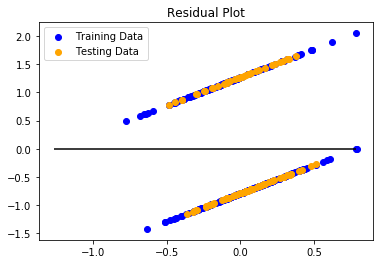

In [42]:
# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [43]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.ensemble import RandomForestClassifier

In [44]:

#Make random forest object
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [45]:

## Here we train the model
#clf.fit(X_train.iloc[:, : 8], y_train.ravel())
clf.fit(X_train, y_train.ravel())

C:\Users\Kabooboo\Anaconda3\envs\PythonData\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [46]:

#SHOW THE TEST DATA
X_test.head()

Age  Height  Weight    GP    MP  Pos_C  Pos_PF  Pos_PG  Pos_PG-SG  \
302  29.0    6.42   201.0  67.0  27.5      0       0       0          0   
47   21.0    6.75   190.0  52.0  33.5      0       0       0          0   
247  26.0    6.33   205.0  60.0  22.8      0       0       1          0   
241  32.0    6.75   235.0  77.0  23.4      0       1       0          0   
312  29.0    6.58   215.0  78.0  34.3      0       0       0          0   

     Pos_SF  Pos_SF-SG  Pos_SG  
302       0          0       1  
47        1          0       0  
247       0          0       0  
241       0          0       0  
312       0          0       1

In [47]:
# Predict injury or no injury using clf model
#Here we run on the test set
preds=clf.predict(X_test)
print(len(preds))

98


In [48]:
#Print summary information from running prediction on X_test set
newdf=X_test
newdf['predicted']=preds
#print(newdf['predicted'].value_counts)
#newdf.index
#newdf.head()
odf=Encoded_df.loc[newdf.index]
odf['predicted']=preds
print("Predicted as injured:")
print(newdf.loc[newdf.predicted==1].shape)
print("Predicted as not injured")
print(newdf.loc[newdf.predicted==0].shape)

Predicted as injured:
(59, 13)
Predicted as not injured
(39, 13)


C:\Users\Kabooboo\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [49]:

#Show original data with labels and predictions 
odf.head(50)

Player Team   Age  Height  Weight    GP  \
302          Kent Bazemore  ATL  29.0    6.42   201.0  67.0   
47          Brandon Ingram  LAL  21.0    6.75   190.0  52.0   
247           Jerian Grant  ORL  26.0    6.33   205.0  60.0   
241             Jeff Green  WAS  32.0    6.75   235.0  77.0   
312          Klay Thompson  GSW  29.0    6.58   215.0  78.0   
406              Pau Gasol  MIL  38.0    7.00   250.0  30.0   
130           Dion Waiters  MIA  27.0    6.33   215.0  44.0   
386          Nicolas Batum  CHA  30.0    6.67   200.0  75.0   
146          Dwight Powell  DAL  27.0    6.92   240.0  77.0   
21         Andrew Harrison  NOP  24.0    6.50   213.0  17.0   
420         Richaun Holmes  PHX  25.0    6.83   235.0  70.0   
502         Tyrone Wallace  LAC  25.0    6.42   198.0  62.0   
202           Isaiah Hicks  NYK  24.0    6.75   230.0   3.0   
119         Derrick Favors  UTA  27.0    6.83   265.0  76.0   
246             Jeremy Lin  TOR  30.0    6.25   200.0  74.0   
95              Dante Exum  UTA  23.0    6.50   190.0  42.0   
318            Kyle Korver  UTA  38.0    6.58   212.0  70.0   
161         Ersan Ilyasova  MIL  32.0    6.83   235.0  67.0   
286        Justin Anderson  ATL  25.0    6.50   230.0  48.0   
402       Patrick Beverley  LAC  30.0    6.08   185.0  78.0   
68           Cheick Diallo  NOP  22.0    6.75   220.0  64.0   
256             Joe Harris  BKN  27.0    6.50   218.0  76.0   
179  Giannis Antetokounmpo  MIL  24.0    6.92   242.0  72.0   
138         Doug McDermott  IND  27.0    6.67   225.0  77.0   
222         Jamal Crawford  PHX  39.0    6.42   185.0  64.0   
422       Robert Covington  MIN  28.0    6.75   225.0  35.0   
273        Jordan Clarkson  CLE  27.0    6.42   194.0  81.0   
86            Damian Jones  GSW  23.0    7.00   245.0  24.0   
437            Salah Mejri  DAL  33.0    7.17   235.0  36.0   
25              Ante Zizic  CLE  22.0    6.92   254.0  59.0   
80       Cristiano Felicio  CHI  26.0    6.83   265.0  60.0   
78             Cory Joseph  IND  27.0    6.25   193.0  82.0   
101            David Nwaba  CLE  26.0    6.33   219.0  51.0   
2              Abdel Nader  OKC  25.0    6.50   225.0  61.0   
316              Kris Dunn  CHI  25.0    6.33   205.0  46.0   
319             Kyle Kuzma  LAL  23.0    6.75   220.0  70.0   
219           Jakob Poeltl  SAS  23.0    7.00   230.0  77.0   
295          Kawhi Leonard  TOR  28.0    6.58   230.0  60.0   
110        DeMarre Carroll  BKN  32.0    6.67   215.0  67.0   
327      Langston Galloway  DET  27.0    6.17   200.0  80.0   
8              Alex Caruso  LAL  25.0    6.42   186.0  25.0   
149          E'Twaun Moore  NOP  30.0    6.33   191.0  53.0   
464      Terrance Ferguson  OKC  21.0    6.58   190.0  74.0   
358          Mason Plumlee  DEN  29.0    6.92   235.0  82.0   
99         Darren Collison  IND  31.0    6.00   175.0  76.0   
183           Gorgui Dieng  MIN  29.0    6.92   252.0  76.0   
443         Shabazz Napier  BKN  27.0    6.08   180.0  56.0   
59           Cameron Payne  CLE  24.0    6.25   190.0  40.0   
205              Ivan Rabb  MEM  22.0    6.83   220.0  49.0   
352          Mario Hezonja  NYK  24.0    6.67   225.0  58.0   

     Injury Status_Injured    MP Pos  predicted  
302                      1  27.5  SG          1  
47                       1  33.5  SF          1  
247                      0  22.8  PG          1  
241                      0  23.4  PF          1  
312                      0  34.3  SG          1  
406                      1  23.5   C          1  
130                      1  30.6  SG          1  
386                      1  31.0  SG          1  
146                      1  21.2   C          1  
21                       1  23.7  PG          0  
420                      1  15.5   C          1  
502                      0  28.4  PG          1  
202                      0  13.3  PF          0  
119                      1  28.0   C          1  
246                      1  25.0  PG          0  
95    

In [51]:
# library & dataset
import seaborn as sns
df = Encoded_df
import matplotlib.pyplot as plt

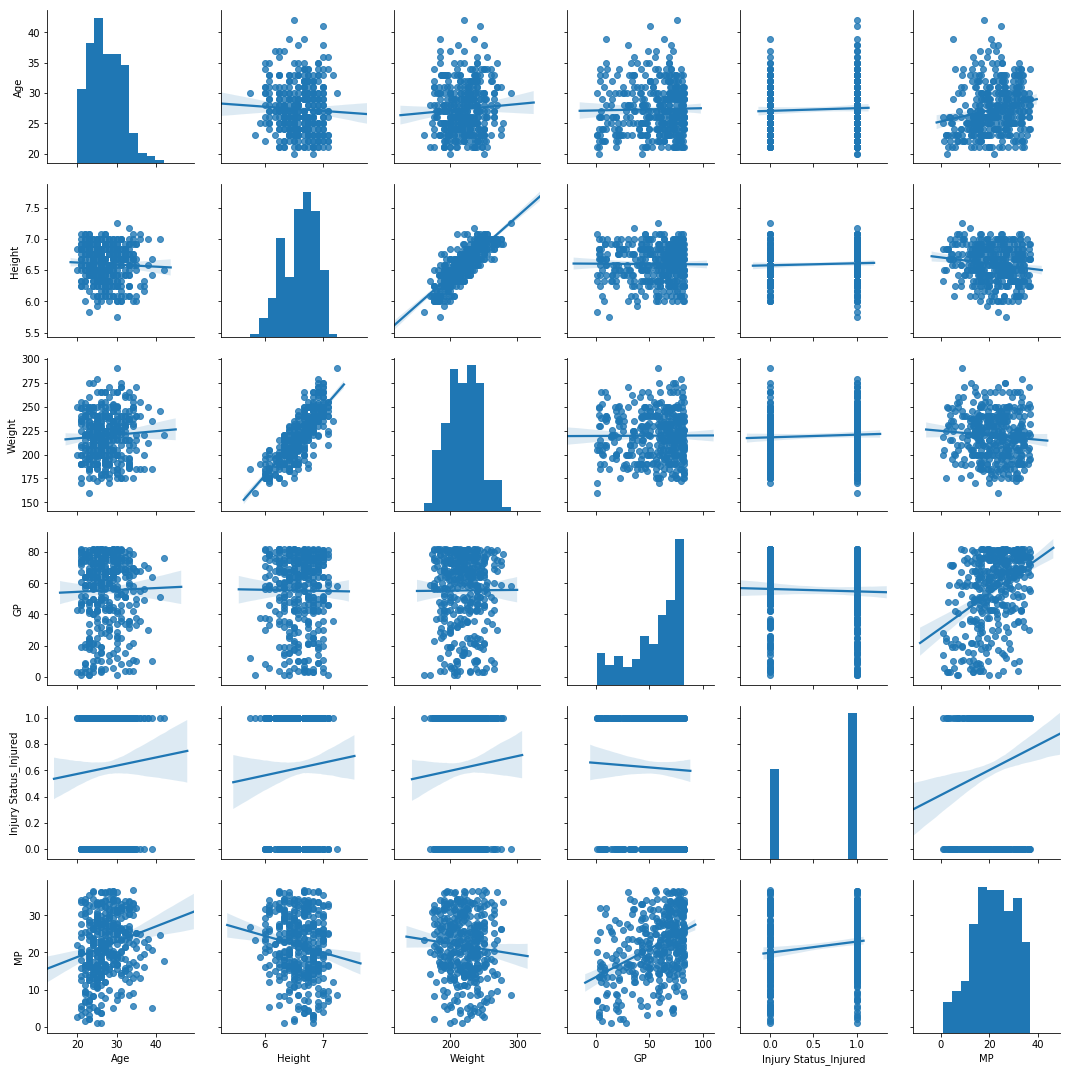

In [57]:
# Basic correlogram with regression
sns.pairplot(df, kind="reg")
plt.show()
 